In [1]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import tensorflow as tf

Using backend: tensorflow.compat.v1

2023-05-15 01:55:46.211104: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term


2023-05-15 01:55:55.593257: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 01:55:56.319744: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 01:55:56.320446: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Enable just-in-time compilation with XLA.




In [2]:
R = 1
n = 3
l = 2

As DeepXDE does not support complex numbers, we need to have the angular part of the solution hard-coded

In [13]:
def angular(theta):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(theta * l * 1j)

In [3]:
def radial(r):
    normalization_constant = np.sqrt(2) / (R * np.abs(sp.jn_zeros(l + 1, n)[-1]))
    bessel = sp.jv(l, sp.jn_zeros(l, n)[-1] * (r / R))

    return normalization_constant * bessel

In [14]:
def psi(x):
    r, theta = x[:, 0:1], x[:, 1:2]
    
    radial_part = radial(r)
    angular_part = angular(theta)

    return radial_part * angular_part

In [7]:
domain = dde.geometry.Interval(0, R)

In [8]:
num_train = 64
num_test = 100
data = dde.data.Function(domain, radial, num_train, num_test)

In [9]:
activation = 'tanh'
initializer = 'Glorot uniform'
net = dde.nn.FNN([1] + [50] * 5 + [1], activation, initializer)

In [10]:
model = dde.Model(data, net)
model.compile('adam', lr=0.001, metrics=['l2 relative error'])

Compiling model...
Building feed-forward neural network...
'build' took 0.157442 s



/home/piotr/repos/quant-chem-pinns/venv/lib/python3.10/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
2023-05-15 02:00:26.691054: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 02:00:26.691400: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 02:00:26.691691: I tensorflow/compiler/x

'compile' took 4.916757 s



2023-05-15 02:00:31.272892: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 02:00:31.275915: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 02:00:31.276142: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [11]:
loss_history, train_state = model.train(iterations=10000)

Initializing variables...


2023-05-15 02:00:33.898821: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


Training model...



2023-05-15 02:00:34.207418: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fa82c0073f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-15 02:00:34.207468: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce 940MX, Compute Capability 5.0
2023-05-15 02:00:34.216144: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-15 02:00:43.442306: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8901
2023-05-15 02:00:52.055393: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss    Test loss     Test metric   
0         [2.60e-03]    [2.61e-03]    [1.83e+00]    
1000      [2.23e-05]    [2.16e-05]    [1.66e-01]    
2000      [9.05e-05]    [9.04e-05]    [3.40e-01]    
3000      [2.00e-06]    [1.97e-06]    [5.03e-02]    
4000      [2.03e-06]    [2.02e-06]    [5.09e-02]    
5000      [1.17e-06]    [1.15e-06]    [3.83e-02]    
6000      [1.16e-06]    [1.13e-06]    [3.81e-02]    
7000      [8.39e-07]    [8.23e-07]    [3.25e-02]    
8000      [9.35e-07]    [9.13e-07]    [3.42e-02]    
9000      [6.42e-07]    [6.20e-07]    [2.82e-02]    
10000     [6.26e-07]    [6.01e-07]    [2.77e-02]    

Best model at step 10000:
  train loss: 6.26e-07
  test loss: 6.01e-07
  test metric: [2.77e-02]

'train' took 31.144630 s



Saving loss history to /home/piotr/repos/quant-chem-pinns/potential-well/2d/circle/loss.dat ...
Saving training data to /home/piotr/repos/quant-chem-pinns/potential-well/2d/circle/train.dat ...
Saving test data to /home/piotr/repos/quant-chem-pinns/potential-well/2d/circle/test.dat ...


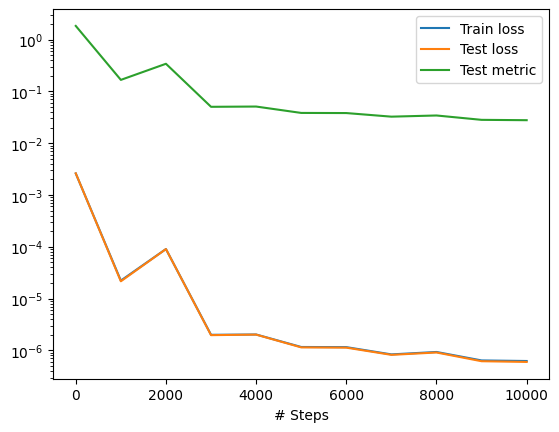

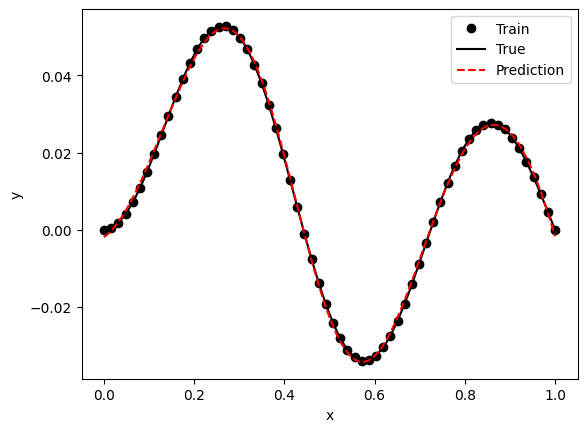

In [12]:
dde.saveplot(loss_history, train_state, issave=True, isplot=True)

In [15]:
def psi_model(x):
    r, theta = x[:, 0:1], x[:, 1:2]
    radial_part = model.predict(r)
    angular_part = angular(theta)
    
    return radial_part * angular_part

In [16]:
def diff_function(x):
    model_value = psi_model(x)
    true_value = psi(x)
    return np.abs(model_value - true_value)

In [17]:
diff_function(np.array([[0.0, 0.0], [1.0, 0.0]]))

array([[0.00078464],
       [0.00069022]])

In [18]:
def plot_2d_map(plotted_function, grid_dist=0.01):
    x_ax = np.arange(0, R, grid_dist)
    y_ax = np.arange(0, 2 * np.pi, grid_dist)
    grid_x, grid_y = np.meshgrid(x_ax, y_ax)
    
    diff_list = []
    for a, b in zip(grid_x, grid_y):
        pair_list = []
        for x, y in zip(a, b):
            pair_list.append([x, y])
        pairs = np.array(pair_list)
        diff_list.append(np.squeeze(plotted_function(pairs)))

    diff_list = np.abs(np.array(diff_list))
    
    im = plt.imshow(diff_list, cmap=plt.cm.RdBu)
    plt.colorbar(im)

    plt.show()

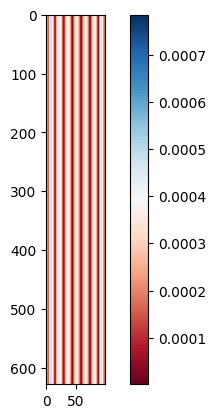

In [19]:
plot_2d_map(diff_function)

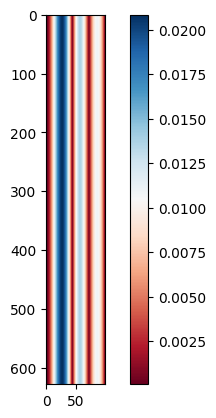

In [21]:
plot_2d_map(psi_model)

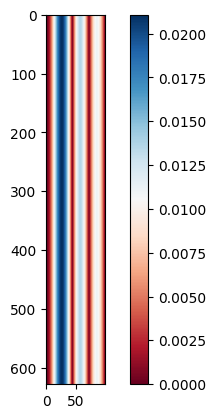

In [22]:
plot_2d_map(psi)